In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from logging import getLogger

# 常に全てのカラムを表示
pd.options.display.max_columns = None

# データ取り込み

In [6]:
# 広告情報
ad = pd.read_csv("input/ad_result.csv", header="infer")
all_df = pd.DataFrame(ad)

In [7]:
# データ中身確認
print(all_df.head())

     month  tvcm  magazine  install
0  2013-01  6358      5955    53948
1  2013-02  8176      6069    57300
2  2013-03  6853      5862    52057
3  2013-04  5271      5247    44044
4  2013-05  6473      6365    54063


In [9]:
all_df.head(10)

,month,tvcm,magazine,install
0,2013-01,6358,5955,53948
1,2013-02,8176,6069,57300
2,2013-03,6853,5862,52057
3,2013-04,5271,5247,44044
4,2013-05,6473,6365,54063
5,2013-06,7682,6555,58097
6,2013-07,5666,5546,47407
7,2013-08,6659,6066,53333
8,2013-09,6066,5646,49918
9,2013-10,10090,6545,59963


## データ加工

In [27]:
# 新しいカラムでフラグ化  (クリックしたか)
# all_df['has_click'] = 0
# all_df.loc[all_df['test_case_g'].isnull() == False, 'has_click'] = 1


## 可視化

In [10]:
# EDA
import pandas_profiling as pp
import pixiedust as px
pp.ProfileReport(all_df)


Pixiedust database opened successfully


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Number of variables,4
Number of observations,10
Total Missing (%),0.0%
Total size in memory,400.0 B
Average record size in memory,40.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [11]:
px.display(all_df)

month,tvcm,magazine,install
2013-01,6358,5955,53948
2013-02,8176,6069,57300
2013-03,6853,5862,52057
2013-04,5271,5247,44044
2013-05,6473,6365,54063
2013-06,7682,6555,58097
2013-07,5666,5546,47407
2013-08,6659,6066,53333
2013-09,6066,5646,49918
2013-10,10090,6545,59963


In [12]:
from pivottablejs import pivot_ui
pivot_ui(all_df, outfile_path="lr.html")

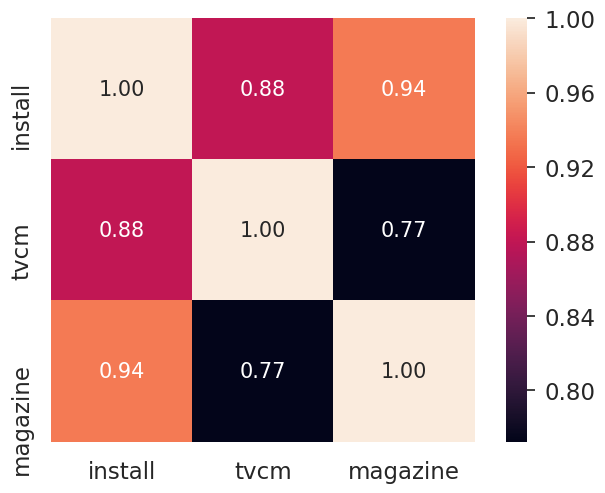

In [33]:
# 相関行列
cols  = ["install", "tvcm", "magazine"]

cm = np.corrcoef(all_df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

/root/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


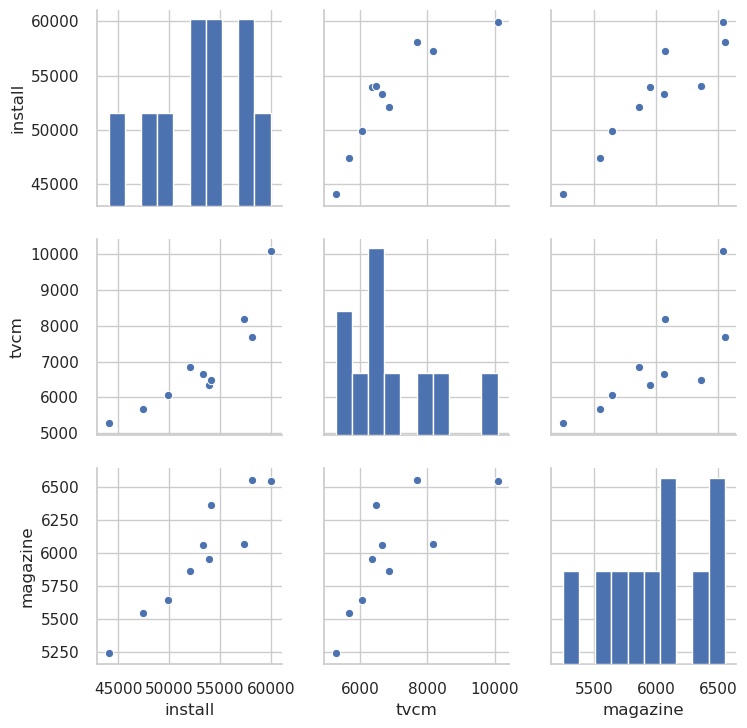

In [35]:
# 散布図行列
cols  = ["install", "tvcm", "magazine"]
sns.set(style='whitegrid', context='notebook')
sns.pairplot(all_df[cols], size=2.5)
plt.show()

##　モデリング

In [17]:
all_df.iloc[:, 1:3]

,tvcm,magazine
0,6358,5955
1,8176,6069
2,6853,5862
3,5271,5247
4,6473,6365
5,7682,6555
6,5666,5546
7,6659,6066
8,6066,5646
9,10090,6545


In [63]:
# 標準化
from sklearn.preprocessing import StandardScaler
# 交差検証
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

y = all_df["install"]
X = all_df.iloc[:, 1:3]

In [64]:
# 重回帰分析
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# 回帰係数
print(model.coef_)
 
# 切片 (誤差)
print(model.intercept_)
 
# 決定係数
print(model.score(X, y))


[1.3609213  7.24980915]
188.174274830395
0.9379014301044469
